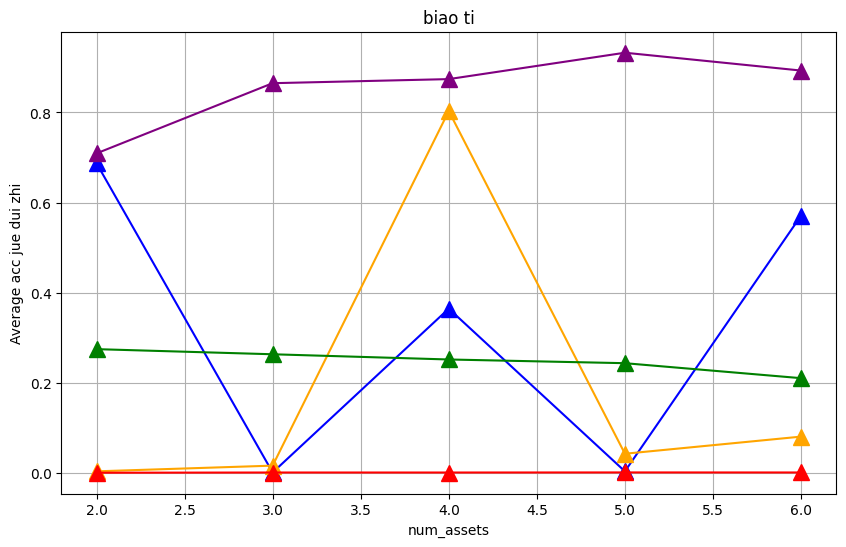

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# 文件名和对应颜色
file_colors = {
    'hybrid-5.csv': 'blue',
    'qiskit-5.csv': 'orange',
    'sapo_without_eigen-5.csv': 'green',
    'sapo_without_scale-5.csv': 'red',
    'sapo-5.csv': 'purple'
}

# 存储每个文件的数据框
dfs = {}

# 读取CSV文件并计算绝对值平均值
for file_name, color in file_colors.items():
    df = pd.read_csv(file_name)
    df['tickers'] = df['tickers'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x != '[]' else [])
    df['acc'] = df['acc'].apply(abs)
    avg_values = df.groupby('num_assets')['acc'].mean()
    dfs[file_name] = {'num_assets': avg_values.index, 'acc_avg': avg_values.values, 'color': color}

# 绘制折线图
plt.figure(figsize=(10, 6))

for file_name, data in dfs.items():
    plt.plot(data['num_assets'], data['acc_avg'], label=file_name, color=data['color'], marker='^', markersize=12)

plt.xlabel('num_assets')
plt.ylabel('Average acc jue dui zhi')
plt.title('biao ti')
# plt.legend()
plt.grid(True)
plt.show()


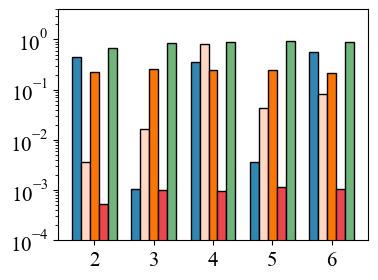

1.5078064934726327 185.22485373172807
838.1448004807812 53.2512245747091
2.413223077760471 1.0883386189928848
258.4583140343885 21.870941461888883
1.5640004821951559 11.073783793826115
220.4176289137196 54.501828436229005


array([0.66363304, 0.86494423, 0.87400397, 0.93256644, 0.89299172])

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np  # Import numpy for handling log10

# 文件名和对应颜色
file_colors = {
    'hybrid-5.csv': '#2D88B5',  # RGB for 'tab:blue'
    'qiskit-5.csv': '#FFD7C3',  # RGB for 'tab:orange'
    'sapo_without_eigen-5.csv': '#FF7500',  # RGB for 'tab:green'
    'sapo_without_scale-5.csv': '#F0454D',  # RGB for 'tab:red'
    'sapo-5.csv': '#6DB77A'  # RGB for 'tab:purple'
}

# 存储每个文件的数据框
dfs = {}
# 读取CSV文件并计算绝对值平均值
for file_name, color in file_colors.items():
    df = pd.read_csv(file_name)
    df['tickers'] = df['tickers'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x != '[]' else [])
    # df['acc'] = df['acc'].apply(abs)
    avg_values = df.groupby('num_assets')['acc'].mean()
    dfs[file_name] = {'num_assets': avg_values.index, 'acc_avg': avg_values.values, 'color': color}

# Set font family and font size
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 15  # Adjust the font size as needed

# 绘制柱状图
plt.figure(figsize=(4, 3))

bar_width = 0.15
bar_positions = []

for i, (file_name, data) in enumerate(dfs.items()):
    positions = [pos + (i - 2) * bar_width for pos in data['num_assets']]
    plt.bar(positions, data['acc_avg'], label=file_name, color=data['color'], width=bar_width, edgecolor='black')
    bar_positions.extend(positions)

plt.yscale('log')  # Set the y-axis to logarithmic scale
plt.xticks([2, 3, 4, 5, 6])
plt.ylim(0.0001, 4)
plt.savefig('pa1.svg', format='svg', bbox_inches='tight')

plt.show()
i = dfs['hybrid-5.csv']['acc_avg']
j = dfs['qiskit-5.csv']['acc_avg']
k = dfs['sapo-5.csv']['acc_avg']
ki, kj = 0, 0
for a, b, c in zip(i, j, k):
    ki += c / a
    kj += c / b
    print(c/ a, c / b)
print(ki / 5, kj / 5)

dfs['sapo-5.csv']['acc_avg']


In [4]:
import matplotlib.colors as mcolors

# Define the colors
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Get RGB values
rgb_values = [tuple(int(255 * x) for x in mcolors.to_rgba(color)[:3]) for color in colors]

# Print RGB values in the 0-255 scale
for color, rgb in zip(colors, rgb_values):
    print(f"{color}: {rgb}")


tab:blue: (31, 119, 180)
tab:orange: (255, 127, 14)
tab:green: (44, 160, 44)
tab:red: (214, 39, 40)
tab:purple: (148, 103, 189)


In [4]:
import ast
ast.literal_eval('[1,2], 5')

([1, 2], 5)